In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib
# 한글출력
import matplotlib.font_manager as fm

# font_location = '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf'
# font_name = fm.FontProperties(fname = font_location).get_name()
# matplotlib.rc('font',family = font_name)

mfile = pd.read_csv('mfile_1.csv', encoding = 'utf-8')
#mfile.head()
dt_A = pd.read_csv('dt_A.csv')
dt_B = pd.read_csv('dt_B.csv')
dt_C = pd.read_csv('dt_C.csv')
dt_D = pd.read_csv('dt_D.csv')


In [3]:
dt_D

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각,월,요일
0,2018-01-02,133834304,정상회원,잡곡,콩/화본/깨,화본,귀리(무/500g),1.0,8232,매장D,NaN,10:32,1,화
1,2018-01-02,749556736,정상회원,잡곡,콩/화본/깨,토종,선비콩/유(500g),1.0,17038,매장D,NaN,10:44,1,화
2,2018-01-02,787320768,정상회원,채소,잎/줄기채소,시금치,시금치(300g),1.0,4403,매장D,NaN,11:10,1,화
3,2018-01-02,175843008,정상회원,채소,뿌리채소,당근,당근(500g),2.0,5360,매장D,NaN,11:45,1,화
4,2018-01-02,165261952,정상회원,간식,밀가공,만두,군만두(500g),1.0,8998,매장D,NaN,12:14,1,화
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55087,2018-10-31,560448896,정상회원,주곡,멥쌀,멥쌀,백미/유(2kg),1.0,15315,매장D,NaN,13:16,10,수
55088,2018-10-31,68976384,정상회원,채소,잎/줄기채소,시금치,시금치(300g),2.0,6892,매장D,NaN,11:08,10,수
55089,2018-10-31,1519813440,정상회원,반찬,밑반찬,김가공,구운자른김(15g*3봉),1.0,7466,매장D,NaN,14:27,10,수
55090,2018-10-31,654809792,정상회원,반찬,두부/유부,두부,두부(1모:420g),1.0,3733,매장D,NaN,16:02,10,수


# 동별 A지점 매출

In [6]:
# 주소에서 구, 동 변수 추가
mfile['구'] = mfile.주소.str.split('-').str[0]
mfile['동'] = mfile.주소.str.split('-').str[1]

# 조합원상태가 겹치므로 제거하고 merging해주기
mfile_abstract_johapwon = mfile.drop(['조합원상태'], axis = 1, inplace = False)

dtA_merge = pd.merge(dt_A, mfile_abstract_johapwon, on = '회원번호', how = 'left')
dtB_merge = pd.merge(dt_B, mfile_abstract_johapwon, on = '회원번호', how = 'left')
dtC_merge = pd.merge(dt_C, mfile_abstract_johapwon, on = '회원번호', how = 'left')
dtD_merge = pd.merge(dt_D, mfile_abstract_johapwon, on = '회원번호', how = 'left')

In [7]:
dtA_merge

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,...,요일,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,연령대,구,동
0,2018-01-02,220954944,정상회원,반찬,두부/유부,두부,두부(1모:420g),1.0,3829,매장A,...,화,수지구-동천동,남,51.0,미신청,수신,normal,50대,수지구,동천동
1,2018-01-02,89023040,정상회원,채소,열매채소,단호박/손질,단호박(깍뚝썰기/300g),1.0,4977,매장A,...,화,분당구-구미동,여,48.0,신청,.,normal,40대,분당구,구미동
2,2018-01-02,354941440,정상회원,축산물,알,유정란,유정란/매장용(10알/국내산),1.0,7083,매장A,...,화,수지구-동천동,여,50.0,미신청,.,normal,50대,수지구,동천동
3,2018-01-02,786634048,탈퇴,반찬,어묵/묵,묵,도토리묵(420g:1모),1.0,7083,매장A,...,화,수지구-동천동,여,38.0,미신청,.,normal,30대,수지구,동천동
4,2018-01-02,438543104,정상회원,축산물,알,유정란,유정란/매장용(10알/국내산),1.0,7083,매장A,...,화,분당구-판교동,여,50.0,미신청,.,normal,50대,분당구,판교동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52554,2018-10-31,1110819712,정상회원,채소,뿌리채소,무,무(0.7~1kg미만),1.0,2680,매장A,...,수,수지구-기타,여,50.0,미신청,.,normal,50대,수지구,기타
52555,2018-10-31,1517953728,정상회원,채소,양념채소,쪽파,쪽파(500g),1.0,4212,매장A,...,수,수지구-동천동,남,44.0,미신청,.,normal,40대,수지구,동천동
52556,2018-10-31,713691392,정상회원,반찬,밑반찬,조림,우엉조림(반찬용/150g),1.0,7658,매장A,...,수,수지구-동천동,여,49.0,신청,.,normal,40대,수지구,동천동
52557,2018-10-31,247926336,정상회원,간식,빵,건강곡물빵,감자바게트(180g)/매장,1.0,5169,매장A,...,수,수지구-동천동,남,63.0,미신청,.,normal,60대이상,수지구,동천동


In [15]:
dtA_dong_sales_income = dtA_merge.groupby(['주소'])['구매금액'].sum()
dtA_dong_sales = dtA_dong_sales_income.sort_values(ascending =False)
dtA_dong_sales

주소
수지구-동천동     324386087
수지구-풍덕천동     96170409
수지구-기타       23885275
기타-기타        22806101
수지구-신봉동      14709478
              ...    
처인구-이동면         11008
처인구-고림동          9380
수정구-신흥동          5935
수정구-태평동          5360
광주-산성동           3542
Name: 구매금액, Length: 73, dtype: int64

## dt1 = 한살림 수지매장(풍덕천동) C
## dt2 = 한살림 신봉매장 D
## dt3 = 한살림 상현매장 B
## dt4 = 한살림 동천매장 A

In [24]:
dtA_distance = pd.read_csv('A매장_거리.csv')

In [26]:
dtA_distance

,위치,거리,구
0,광주-기타,29,광주
1,광주-산성동,24,광주
2,광주-오포읍,20,광주
3,기타-금광동,25,중원구
4,기타-기타,17,성남
...,...,...,...
68,처인구-역북동,24,처인구
69,처인구-원삼면,45,처인구
70,처인구-이동면,31,처인구
71,하남-기타,34,하남


In [16]:
dtA_dong = pd.DataFrame(dtA_dong_sales)
dtA_dong

,구매금액
주소,
수지구-동천동,324386087
수지구-풍덕천동,96170409
수지구-기타,23885275
기타-기타,22806101
수지구-신봉동,14709478
...,...
처인구-이동면,11008
처인구-고림동,9380
수정구-신흥동,5935


# 거리랑 구매금액의 상관관계(산점도)

In [27]:
dtA_dist_sale = pd.merge(dtA_distance, dtA_dong, left_on = '위치', right_on = '주소', how = 'left')

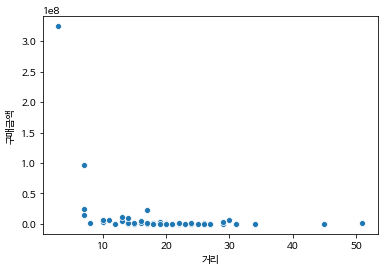

In [30]:
sns.scatterplot('거리','구매금액',data = dtA_dist_sale)

# 성별 t-test

In [43]:
dtA_merge.sort_values('회원번호').iloc[100:150]

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,...,요일,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,연령대,구,동
14239,2018-03-22,20588608,정상회원,간식,떡,즉석떡,두텁찹쌀떡(70g),2.0,7658,매장A,...,목,수지구-풍덕천동,여,51.0,미신청,수신,VIP,50대,수지구,풍덕천동
3564,2018-01-20,20588608,정상회원,축산물,육가공,햄/소시지/훈제,꼬마소시지(300g)-매장,1.0,8041,매장A,...,토,수지구-풍덕천동,여,51.0,미신청,수신,VIP,50대,수지구,풍덕천동
30488,2018-06-26,20588608,정상회원,간식,식사대용,식사대용/기타,양송이스프(80g),3.0,13784,매장A,...,화,수지구-풍덕천동,여,51.0,미신청,수신,VIP,50대,수지구,풍덕천동
32265,2018-07-06,20588608,정상회원,간식,빵,"식빵, 식사대용",탕종식빵(200g)/매장,1.0,4212,매장A,...,금,수지구-풍덕천동,여,51.0,미신청,수신,VIP,50대,수지구,풍덕천동
30507,2018-06-26,20588608,정상회원,축산물,소,한우,한우분쇄육(300g/국내산),1.0,24505,매장A,...,화,수지구-풍덕천동,여,51.0,미신청,수신,VIP,50대,수지구,풍덕천동
40969,2018-08-23,20588608,정상회원,축산물,소,한우,한우분쇄육(300g/국내산),1.0,24505,매장A,...,목,수지구-풍덕천동,여,51.0,미신청,수신,VIP,50대,수지구,풍덕천동
30592,2018-06-27,20588608,정상회원,축산물,알,유정란,유정란(30알/국내산),1.0,18570,매장A,...,수,수지구-풍덕천동,여,51.0,미신청,수신,VIP,50대,수지구,풍덕천동
47069,2018-09-27,20588608,정상회원,축산물,소,한우,한우분쇄육(300g/국내산),1.0,24505,매장A,...,목,수지구-풍덕천동,여,51.0,미신청,수신,VIP,50대,수지구,풍덕천동
31825,2018-07-03,20588608,정상회원,간식,떡,즉석떡,약식(180g),1.0,6892,매장A,...,화,수지구-풍덕천동,여,51.0,미신청,수신,VIP,50대,수지구,풍덕천동
12035,2018-03-10,20588608,정상회원,간식,떡,즉석떡,말랑말랑백미가래떡(400g),1.0,6318,매장A,...,토,수지구-풍덕천동,여,51.0,미신청,수신,VIP,50대,수지구,풍덕천동


In [67]:
dtA_merge['회원번호'].sort_values().unique()[:100]
#num.sort_values(ascending = False, inplace = True)
#num.head(50)


array([18764160, 20235968, 20258240, 20588608, 22259008, 26355200,
       26676288, 28394944, 29658880, 31691200, 37314880, 38808960,
       38842368, 38918464, 39382464, 40124864, 41754432, 41837952,
       42474560, 43426688, 43872128, 45022848, 46038080, 46056640,
       46568896, 46752640, 47663936, 48398912, 48638336, 48859200,
       51142080, 51897472, 52821760, 53367424, 53432384, 54256448,
       54616512, 55947264, 56530048, 56576448, 57105408, 57272448,
       57727168, 58484416, 59759488, 59774336, 60314432, 61652608,
       62261376, 62326336, 62341184, 62426560, 62688256, 62716096,
       63967040, 64306688, 64330816, 64483008, 64586944, 64861632,
       65888000, 65900992, 65906560, 66053184, 67109248, 67202048,
       67563968, 67987136, 68506816, 69319744, 69403264, 70960448,
       71355776, 71678720, 71767808, 72805312, 73217344, 74188032,
       74470144, 74562944, 74824640, 75381440, 75596736, 78872576,
       79401536, 79451648, 80810240, 81376320, 81704832, 82428

In [32]:
A_male = dtA_merge[dtA_merge['성별'] == "남"]
A_female = dtA_merge[dtA_merge['성별'] == "여"]

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

# 한글출력
import matplotlib
import matplotlib.font_manager as fm

font_location = '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font',family = font_name)']))

# 정규성검정
from scipy.stats import shapiro


In [69]:
A_male_uni = A_male.groupby(['회원번호'])['구매금액'].sum()
df_A_male_uni = pd.DataFrame(A_male_uni)
df_A_male_uni

,구매금액
회원번호,
45022848,255287
48859200,41351
59774336,12060
164094528,150185
205271744,1368615
...,...
1609807168,66813
1610931904,6700
1612307200,70259


In [70]:
A_female_uni = A_female.groupby(['회원번호'])['구매금액'].sum()
df_A_female_uni = pd.DataFrame(A_female_uni)
df_A_female_uni

,구매금액
회원번호,
18764160,21059
20235968,164449
20258240,3063
20588608,2661300
22259008,197375
...,...
1638515776,10338
1640241856,9858
1640596352,33407


In [71]:
df_A_female_uni['구매금액']

회원번호
18764160        21059
20235968       164449
20258240         3063
20588608      2661300
22259008       197375
               ...   
1638515776      10338
1640241856       9858
1640596352      33407
1640913728      16004
1644557056      27951
Name: 구매금액, Length: 2478, dtype: int64

In [72]:
# 정규성 검정
print(shapiro(df_A_male_uni['구매금액'])) # p-value : 0.06
print(shapiro(df_A_female_uni['구매금액'])) # p-value : 0.03 => 정규성이 없다

# 등분산성 검정
print(stats.levene(df_A_male_uni['구매금액'], df_A_female_uni['구매금액'])) # p-value : 0.83 (등분산이라고 가정 가능)


t_result = stats.ttest_ind(df_A_male_uni['구매금액'],df_A_female_uni['구매금액']) 

t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print(t,p)

(0.5094927549362183, 1.531110021365947e-20)
(0.4998781085014343, 0.0)
LeveneResult(statistic=0.23210234512993289, pvalue=0.6300094345821907)
-0.477 0.634


### A매장 2-sample-t-test 검정 결과
- t-statistic : -0.477, p-value : 0.634로 남, 녀 매출합에 차이가 없다.

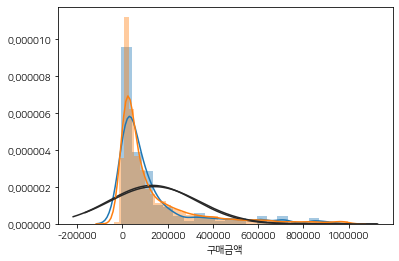

In [76]:
sns.distplot(df_A_male_uni[df_A_male_uni['구매금액']<1000000]['구매금액'], fit = stats.norm, kde = True)
sns.distplot(df_A_female_uni[df_A_female_uni['구매금액']<1000000]['구매금액'], fit = stats.norm, kde = True)


### B매장 성별 매출 차이

(0.5039985775947571, 1.7842657902680582e-23)
(0.5113638639450073, 0.0)
LeveneResult(statistic=6.078966861760871, pvalue=0.013726017885429908)
2.433 0.015


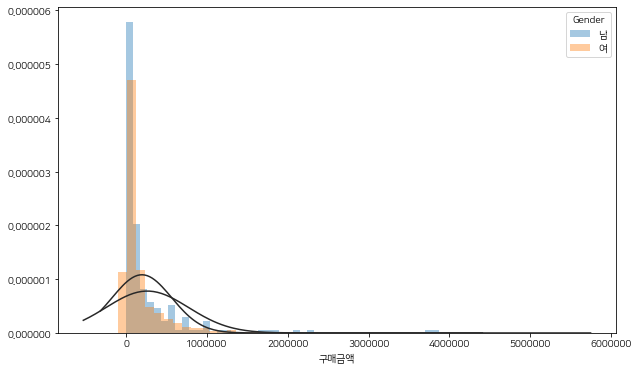

In [86]:
# 성별로 데이터 쪼개기


A_male = dtB_merge[dtB_merge['성별'] == "남"]
A_female = dtB_merge[dtB_merge['성별'] == "여"]

# 회원번호별 구매금액 합계 계산
A_male_uni = A_male.groupby(['회원번호'])['구매금액'].sum()
df_A_male_uni = pd.DataFrame(A_male_uni)

A_female_uni = A_female.groupby(['회원번호'])['구매금액'].sum()
df_A_female_uni = pd.DataFrame(A_female_uni)

# 정규성 검정
print(shapiro(df_A_male_uni['구매금액'])) # p-value : 0.06
print(shapiro(df_A_female_uni['구매금액'])) # p-value : 0.03 => 정규성이 없다

# 등분산성 검정
print(stats.levene(df_A_male_uni['구매금액'], df_A_female_uni['구매금액'])) # p-value : 0.83 (등분산이라고 가정 가능)


t_result = stats.ttest_ind(df_A_male_uni['구매금액'],df_A_female_uni['구매금액']) 

t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print(t,p)

# 두 데이터 산포 시각화
fig = plt.figure(figsize=(10,6))
sns.distplot(df_A_male_uni['구매금액'], fit = stats.norm, kde = False, label = '남')
sns.distplot(df_A_female_uni['구매금액'], fit = stats.norm, kde = False, label = '여')
plt.legend(title="Gender")
plt.show()


### B매장 2-sample-t-test 검정 결과
- t-statistic : 2.433, p-value : 0.015로 남, 녀 매출합에 차이가 있다.
- 남자의 매출합에서 300만원 이상의 이상치가 두개나 있어 집단간 차이가 발생한 것으로 보임

## 300만원 이상의 구매금액합 이상치 확인

In [89]:
df_A_male_uni[df_A_male_uni['구매금액']>3000000]

,구매금액
회원번호,
1283121472,3764660
1670400000,3876681


In [92]:
dt_B[dt_B['회원번호']==1283121472].sort_values(['구매금액'], ascending = False).head(50)

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각,월,요일
52939,2018-09-07,1283121472,정상회원,축산물,소,유기한우,한우불고기/유기(600g/국내산),3.0,219392,매장B,NaN,10:15,9,금
46914,2018-08-08,1283121472,정상회원,축산물,소,유기한우,한우불고기/유기(600g/국내산),3.0,219392,매장B,NaN,10:21,8,수
39165,2018-07-04,1283121472,정상회원,축산물,소,유기한우,한우불고기/유기(600g/국내산),3.0,219392,매장B,NaN,10:16,7,수
39113,2018-07-04,1283121472,정상회원,축산물,소,유기한우,한우장조림/유기(600g/국내산),3.0,217095,매장B,NaN,10:16,7,수
4361,2018-01-22,1283121472,정상회원,건강,건강일반,추출/농축액,흑염소진액(100ml*30봉),1.0,166554,매장B,NaN,10:12,1,월
23906,2018-04-24,1283121472,정상회원,축산물,소,유기한우,한우국거리/유기(300g국내산),3.0,118885,매장B,NaN,10:19,4,화
60782,2018-10-17,1283121472,정상회원,축산물,닭/오리,무항생제닭,닭다리(600g/국내산),6.0,98784,매장B,NaN,10:15,10,수
3020,2018-01-15,1283121472,정상회원,축산물,소,유기한우,한우국거리/유기(600g국내산),1.0,78682,매장B,NaN,13:19,1,월
11473,2018-02-24,1283121472,정상회원,축산물,소,유기한우,한우불고기/유기(600g/국내산),1.0,73131,매장B,NaN,10:13,2,토
25772,2018-05-03,1283121472,정상회원,축산물,소,유기한우,한우장조림/유기(600g/국내산),1.0,72365,매장B,NaN,10:01,5,목


In [93]:
dt_B[dt_B['회원번호']==1670400000].sort_values(['구매금액'], ascending = False).head(50)

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각,월,요일
18873,2018-03-31,1670400000,탈퇴,축산물,육가공,식육추출가공,한우고기곰국(냉동:1.1kg),3.0,67770,매장B,NaN,10:10,3,토
31128,2018-05-29,1670400000,탈퇴,주곡,멥쌀,멥쌀,백미/유(8kg)-매장용,1.0,58773,매장B,NaN,18:43,5,화
56561,2018-09-22,1670400000,탈퇴,반찬,김치,배추,맛김치(1kg),3.0,52838,매장B,NaN,15:31,9,토
51813,2018-09-01,1670400000,탈퇴,양념/가루,기름/식초,기름,참기름(330ml),1.0,48052,매장B,NaN,16:13,9,토
15193,2018-03-14,1670400000,탈퇴,축산물,소,한우(냉장),한우모둠구이용(안심대안/300g/신선육),1.0,44797,매장B,NaN,15:40,3,수
25133,2018-04-30,1670400000,탈퇴,축산물,소,한우(냉장),한우모둠구이용(안심대안/300g/신선육),1.0,44797,매장B,NaN,10:59,4,월
54487,2018-09-14,1670400000,탈퇴,과실,과일,사과,사과(5kg),1.0,44797,매장B,NaN,19:53,9,금
54455,2018-09-14,1670400000,탈퇴,과실,과일,사과,사과(5kg),1.0,44797,매장B,NaN,19:55,9,금
15220,2018-03-14,1670400000,탈퇴,수산,해조,김,돌김(50장),4.0,44414,매장B,NaN,15:40,3,수
3007,2018-01-15,1670400000,탈퇴,음료,음료,두유,검은콩두유(160ml*5봉),4.0,42538,매장B,NaN,18:47,1,월


### C매장 성별 매출 차이

(0.4476467967033386, 2.4620355652887895e-29)
(0.4906020164489746, 0.0)
LeveneResult(statistic=0.30598127399887476, pvalue=0.580179187745169)
-1.019 0.308


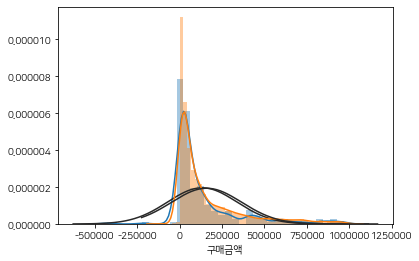

In [78]:
# 성별로 데이터 쪼개기


A_male = dtC_merge[dtC_merge['성별'] == "남"]
A_female = dtC_merge[dtC_merge['성별'] == "여"]

# 회원번호별 구매금액 합계 계산
A_male_uni = A_male.groupby(['회원번호'])['구매금액'].sum()
df_A_male_uni = pd.DataFrame(A_male_uni)

A_female_uni = A_female.groupby(['회원번호'])['구매금액'].sum()
df_A_female_uni = pd.DataFrame(A_female_uni)

# 정규성 검정
print(shapiro(df_A_male_uni['구매금액'])) # p-value : 0.06
print(shapiro(df_A_female_uni['구매금액'])) # p-value : 0.03 => 정규성이 없다

# 등분산성 검정
print(stats.levene(df_A_male_uni['구매금액'], df_A_female_uni['구매금액'])) # p-value : 0.83 (등분산이라고 가정 가능)


t_result = stats.ttest_ind(df_A_male_uni['구매금액'],df_A_female_uni['구매금액']) 

t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print(t,p)

# 두 데이터 산포 시각화
sns.distplot(df_A_male_uni[df_A_male_uni['구매금액']<1000000]['구매금액'], fit = stats.norm, kde = True)
sns.distplot(df_A_female_uni[df_A_female_uni['구매금액']<1000000]['구매금액'], fit = stats.norm, kde = True)


### C매장 2-sample-t-test 검정 결과
- t-statistic : -1.019, p-value : 0.308로 남, 녀 매출합에 차이가 없다.

### D매장 성별 매출 차이

(0.5638018846511841, 1.2913076960680535e-20)
(0.5191604495048523, 0.0)
LeveneResult(statistic=2.0390025213020175, pvalue=0.15342924209103723)
1.394 0.163


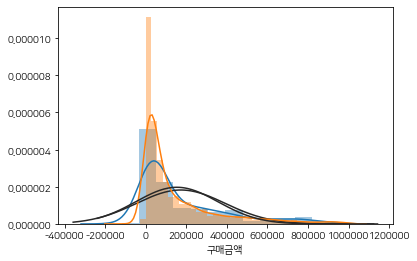

In [79]:
# 성별로 데이터 쪼개기


A_male = dtD_merge[dtD_merge['성별'] == "남"]
A_female = dtD_merge[dtD_merge['성별'] == "여"]

# 회원번호별 구매금액 합계 계산
A_male_uni = A_male.groupby(['회원번호'])['구매금액'].sum()
df_A_male_uni = pd.DataFrame(A_male_uni)

A_female_uni = A_female.groupby(['회원번호'])['구매금액'].sum()
df_A_female_uni = pd.DataFrame(A_female_uni)

# 정규성 검정
print(shapiro(df_A_male_uni['구매금액'])) # p-value : 0.06
print(shapiro(df_A_female_uni['구매금액'])) # p-value : 0.03 => 정규성이 없다

# 등분산성 검정
print(stats.levene(df_A_male_uni['구매금액'], df_A_female_uni['구매금액'])) # p-value : 0.83 (등분산이라고 가정 가능)


t_result = stats.ttest_ind(df_A_male_uni['구매금액'],df_A_female_uni['구매금액']) 

t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print(t,p)

# 두 데이터 산포 시각화
sns.distplot(df_A_male_uni[df_A_male_uni['구매금액']<1000000]['구매금액'], fit = stats.norm, kde = True)
sns.distplot(df_A_female_uni[df_A_female_uni['구매금액']<1000000]['구매금액'], fit = stats.norm, kde = True)


### D매장 2-sample-t-test 검정 결과
- t-statistic : 1.394, p-value : 0.163로 남, 녀 매출합에 차이가 없다.

In [94]:
dtA_merge

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,...,요일,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,연령대,구,동
0,2018-01-02,220954944,정상회원,반찬,두부/유부,두부,두부(1모:420g),1.0,3829,매장A,...,화,수지구-동천동,남,51.0,미신청,수신,normal,50대,수지구,동천동
1,2018-01-02,89023040,정상회원,채소,열매채소,단호박/손질,단호박(깍뚝썰기/300g),1.0,4977,매장A,...,화,분당구-구미동,여,48.0,신청,.,normal,40대,분당구,구미동
2,2018-01-02,354941440,정상회원,축산물,알,유정란,유정란/매장용(10알/국내산),1.0,7083,매장A,...,화,수지구-동천동,여,50.0,미신청,.,normal,50대,수지구,동천동
3,2018-01-02,786634048,탈퇴,반찬,어묵/묵,묵,도토리묵(420g:1모),1.0,7083,매장A,...,화,수지구-동천동,여,38.0,미신청,.,normal,30대,수지구,동천동
4,2018-01-02,438543104,정상회원,축산물,알,유정란,유정란/매장용(10알/국내산),1.0,7083,매장A,...,화,분당구-판교동,여,50.0,미신청,.,normal,50대,분당구,판교동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52554,2018-10-31,1110819712,정상회원,채소,뿌리채소,무,무(0.7~1kg미만),1.0,2680,매장A,...,수,수지구-기타,여,50.0,미신청,.,normal,50대,수지구,기타
52555,2018-10-31,1517953728,정상회원,채소,양념채소,쪽파,쪽파(500g),1.0,4212,매장A,...,수,수지구-동천동,남,44.0,미신청,.,normal,40대,수지구,동천동
52556,2018-10-31,713691392,정상회원,반찬,밑반찬,조림,우엉조림(반찬용/150g),1.0,7658,매장A,...,수,수지구-동천동,여,49.0,신청,.,normal,40대,수지구,동천동
52557,2018-10-31,247926336,정상회원,간식,빵,건강곡물빵,감자바게트(180g)/매장,1.0,5169,매장A,...,수,수지구-동천동,남,63.0,미신청,.,normal,60대이상,수지구,동천동


In [105]:
A_df = dtA_merge[dtA_merge['Gold_member'] == "VIP"]
A_df = A_df.drop_duplicates(['회원번호'])
A = A_df.groupby(['성별'])['회원번호'].count()
A

성별
남     4
여    50
Name: 회원번호, dtype: int64